**DATA SCIENCE INTERNSHIP - TASK 3**

**SKILLCRAFT TECHNOLOGY**

📝 Task 3: Customer Purchase Prediction using Decision Tree Classifier
-----------
In this task, we aim to build a Decision Tree Classifier to predict whether a customer will subscribe to a term deposit based on their demographic and behavioral data. For this purpose, we use the Bank Marketing Dataset provided by the UCI Machine Learning Repository.

This dataset contains information collected from a marketing campaign conducted by a Portuguese banking institution. The goal is to develop a predictive model that can assist banks in identifying potential customers who are more likely to respond positively to marketing efforts.

📌 Objective:
--------
To preprocess the dataset and encode categorical variables.
To train a Decision Tree Classifier on the processed data.
To evaluate the model using metrics like accuracy, precision, recall, and confusion matrix.
To visualize the decision tree and interpret key decision paths and feature importances.
This analysis not only helps in building a predictive system but also provides insights into customer behavior, which can guide more effective and targeted marketing strategies.

In [10]:
#AKASH_TASK_3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/content/bank-full.csv', sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop('y', axis=1)
y = df['y']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [15]:
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8950899439693306
Confusion Matrix:
 [[11596   370]
 [ 1053   545]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.60      0.34      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.69     13564
weighted avg       0.88      0.90      0.88     13564



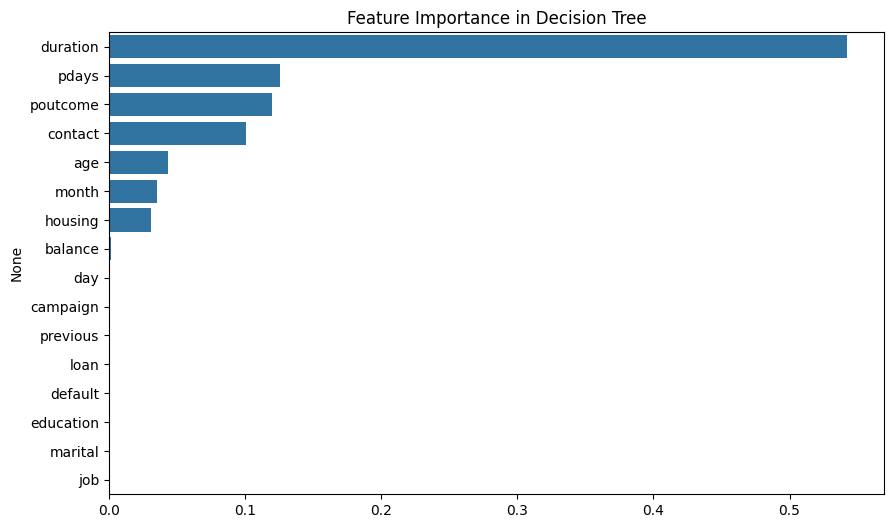

In [16]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance in Decision Tree")
plt.show()


In [17]:
!pip install graphviz pydotplus


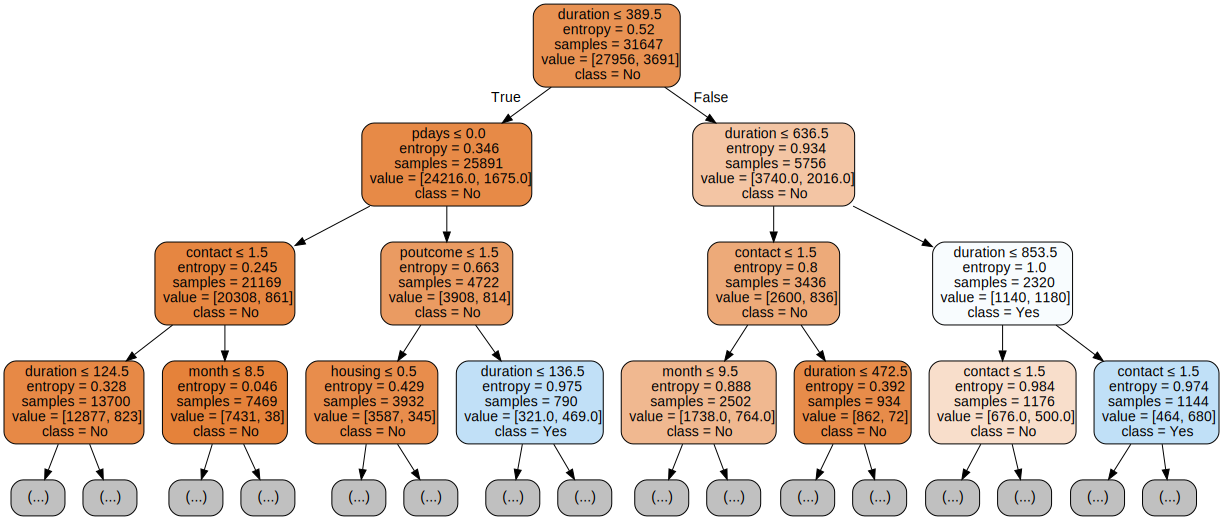

In [18]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           max_depth=3)  # limit visible depth

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='png', cleanup=False)  # Saves image as 'decision_tree.png'
graph


**🔍 Insights**
---
The Decision Tree Classifier was used to predict whether a customer will subscribe to a term deposit based on demographic and behavioral features from the Bank Marketing dataset.

Top features influencing the decision (based on feature importance analysis):
--
duration: Duration of the last contact call.
poutcome: Outcome of the previous marketing campaign.
previous: Number of contacts performed before this campaign.
campaign: Number of contacts during the current campaign.
balance: Customer's average yearly account balance.
Limiting the visualization to the top 3 levels of the tree made it easier to interpret and revealed key decision rules based on duration and poutcome.

The Model achieved an accuracy score of 89%
--
Model Interpretability is a major advantage of Decision Trees, making them suitable for understanding customer behavior.

To improve the model and reduce overfitting:
--
Limit tree depth (max_depth)
Use Cost-Complexity Pruning (ccp_alpha)
Try ensemble methods like Random Forests or Gradient Boosted Trees
This model can serve as a baseline for more advanced customer targeting strategies in marketing campaigns.